In [1]:
from preprocessing import *
from model_train_predict import *
from utils import *

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot

import warnings
warnings.filterwarnings("ignore")

In [2]:
ticker = 'AMZN' # Amazon
number = 1000

df, data = load_data(ticker=ticker, number=number)
print(len(df))

df = df.copy()[:100]

Data saved to : stock_market_data-AMZN_2020-12-14.csv
1000


# 1. Exploratory Data Analys (EDA)

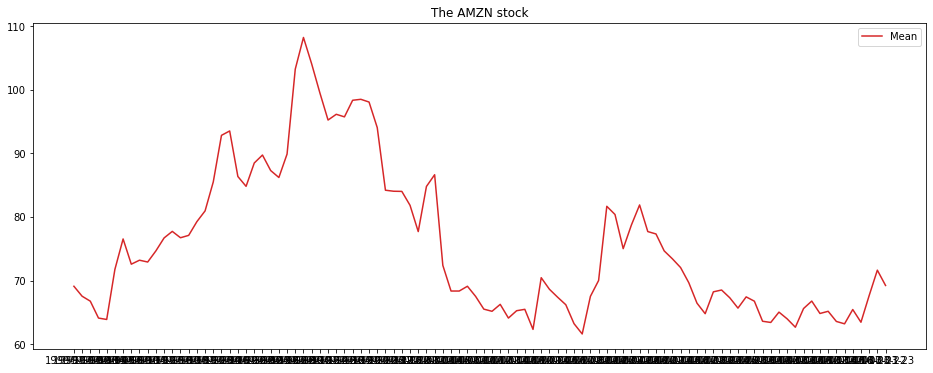

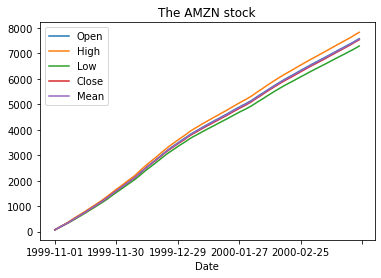

Dickey-Fuller test results

Test Statistic    -1.653186
p-value            0.455379
# of lags          0.000000
# of obs          99.000000
dtype: float64
Critical value at 1%: -3.49820
Critical value at 5%: -2.89121
Critical value at 10%: -2.58260


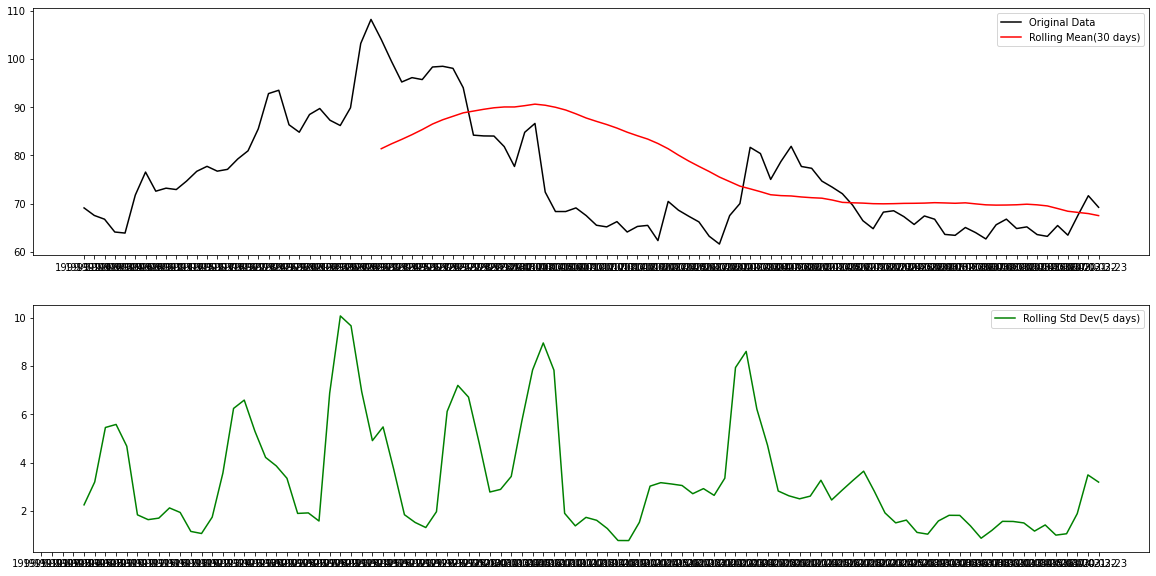

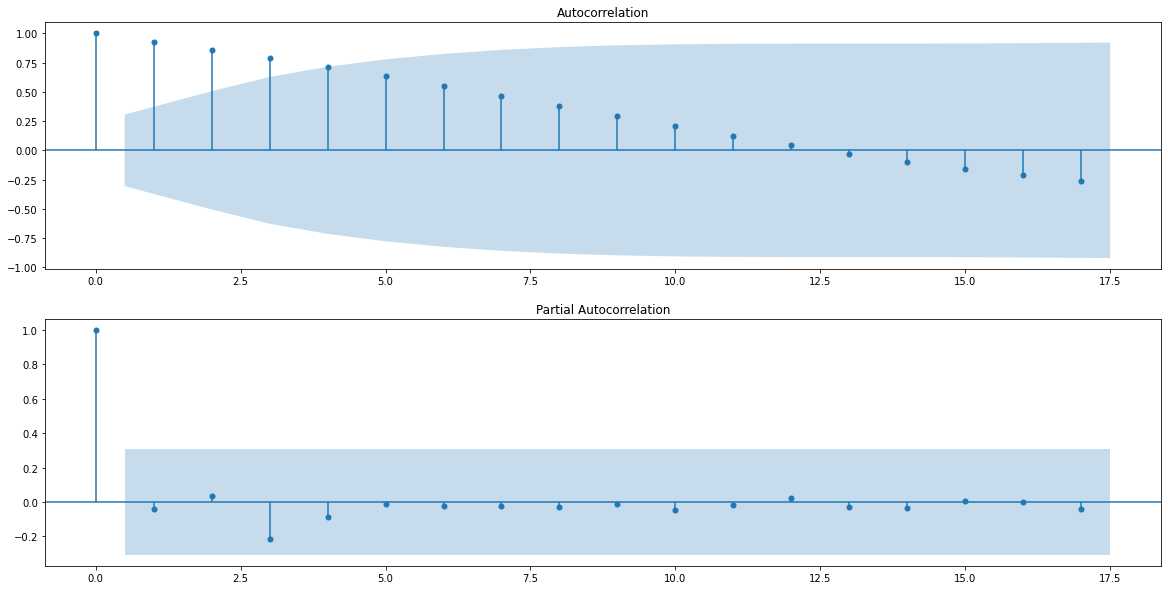

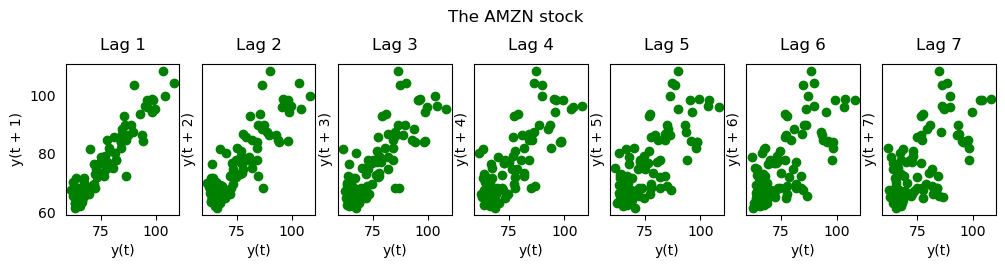

In [3]:
# overview data
plt.figure(figsize=(16,6))
plt.plot(df.Mean, label = "Mean" , color='tab:red')
plt.title(f'The {ticker} stock')
plt.legend(loc='best')
plt.show()

# Draw comulative plot
plot_cumsum(df, ticker)

# check stationarity
check_stationarity(df.Mean)

# Tính Autocorrection and Partial Autocorrection
autocorrelation_partialAutocorrection(df)

# Dùng lag_plot để view autocorrelation
autocorrelation(df, ticker)

## => timeStep = 4 + 1 = 5 (lấy 4 điểm trong quá khứ để dự đoán tương lai)

# 2. Setup general params 

## 2.1 search params for ARIMA

In [4]:
n = int(0.7 * len(data))

data_train = data[:n]
data_test = data[n:]

print(f'The shape of the data_train is {data_train.shape}')
print(f'The shape of the data_test is {data_test.shape}')

n = int(0.1 * len(data))
order = ARIMA_search_params(data[:n])

The shape of the data_train is (700, 1)
The shape of the data_test is (300, 1)
ARIMA(0, 0, 0) RMSE=9.926
ARIMA(0, 0, 1) RMSE=6.229
ARIMA(0, 0, 2) RMSE=4.180
ARIMA(0, 1, 0) RMSE=2.433
ARIMA(0, 1, 1) RMSE=2.613
ARIMA(0, 1, 2) RMSE=2.309
ARIMA(0, 2, 0) RMSE=4.109
ARIMA(0, 2, 1) RMSE=2.470
ARIMA(0, 2, 2) RMSE=2.651
ARIMA(1, 0, 0) RMSE=2.443
ARIMA(1, 0, 1) RMSE=2.607
ARIMA(1, 0, 2) RMSE=2.385
ARIMA(1, 1, 0) RMSE=2.580
ARIMA(1, 1, 1) RMSE=2.467
ARIMA(1, 1, 2) RMSE=2.336
ARIMA(1, 2, 0) RMSE=3.928
ARIMA(1, 2, 1) RMSE=2.630
ARIMA(1, 2, 2) RMSE=2.508
ARIMA(2, 0, 0) RMSE=2.629
ARIMA(2, 0, 1) RMSE=2.488
ARIMA(2, 0, 2) RMSE=2.389
ARIMA(2, 1, 0) RMSE=2.361
ARIMA(2, 1, 1) RMSE=2.377
ARIMA(2, 1, 2) RMSE=2.369
ARIMA(2, 2, 0) RMSE=3.189
ARIMA(2, 2, 1) RMSE=2.435
ARIMA(2, 2, 2) RMSE=2.557
Best ARIMA(0, 1, 2) RMSE=2.309


## 2.2. model params

In [5]:
timeStep=5
epochs = 500

# 3. Build models

## 3.1. ARIMA model

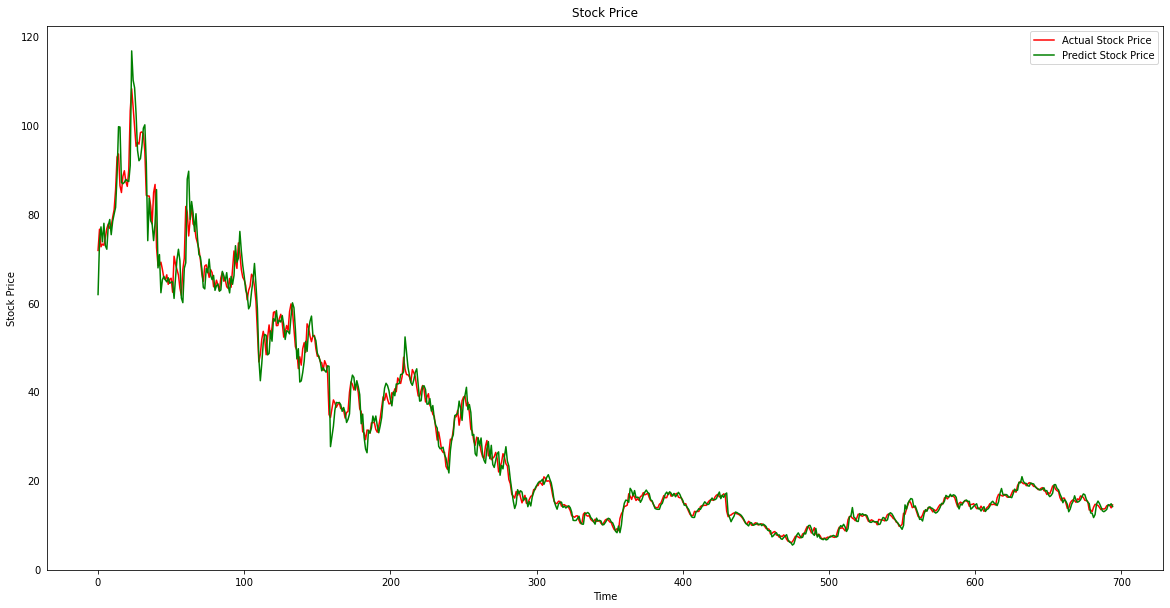

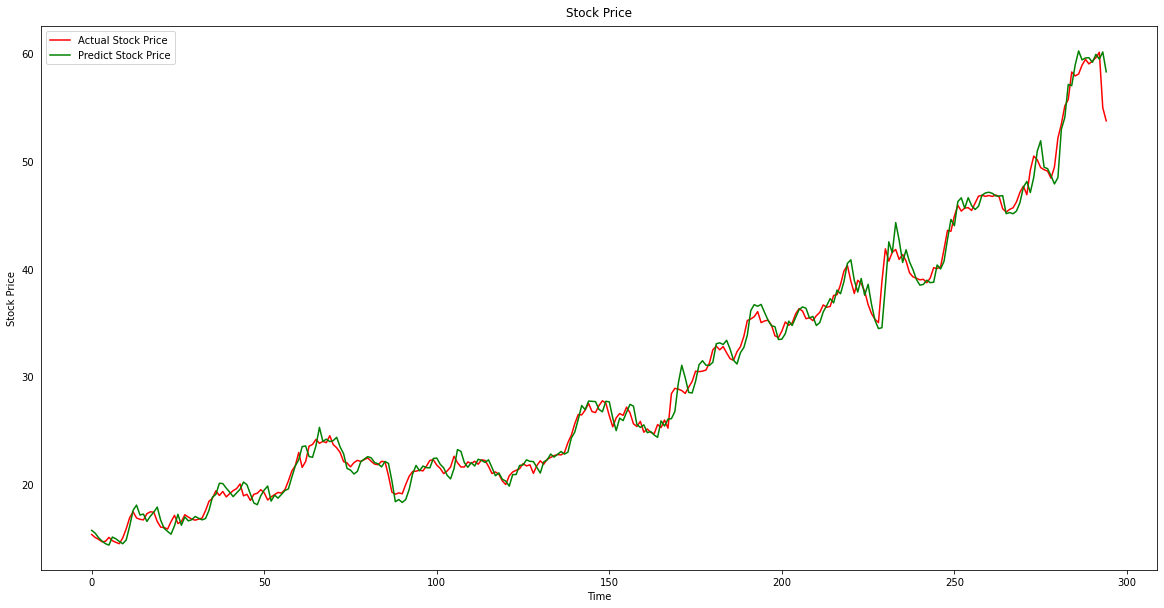

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 2.4816, 1.4793
RMSE_test, MAE_test = 0.9878, 0.7081

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5591
Precision  according to the trend: 0.6034
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5272
Precision  according to the trend: 0.4643


In [6]:
# predict
y_train, y_train_pred = ARIMA_single(data_train, timeStep=timeStep, order=order)

y_test, y_test_pred = ARIMA_single(data_test, timeStep=timeStep, order=order)

# plot graph
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)


print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.2. LSTM model

Epoch 1/500
18/18 [==============================] - 2s 136ms/step - loss: 0.0570 - val_loss: 0.0031
Epoch 2/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0178 - val_loss: 0.0146
Epoch 3/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0094 - val_loss: 0.0014
Epoch 4/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 4.5787e-04
Epoch 5/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0033 - val_loss: 1.5307e-04
Epoch 6/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 8.9968e-05
Epoch 7/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0031 - val_loss: 7.6979e-05
Epoch 8/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 8.1757e-05
Epoch 9/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 2.9687e-04
Epoch 10/500
18/18 [==============================] - 0s 13ms/step - loss: 

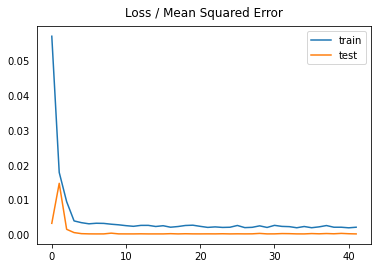

In [7]:
# train
model_lstm, hist_lstm, sc = LSTM_model(data_train, epochs=epochs, timeStep=timeStep)

plot_history(hist_lstm)

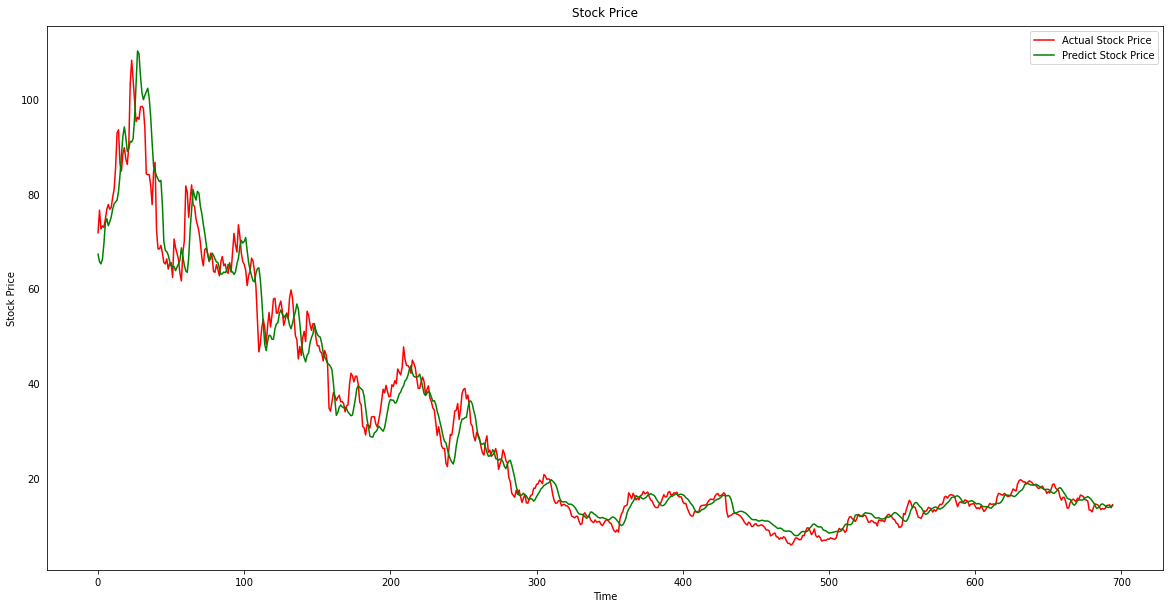

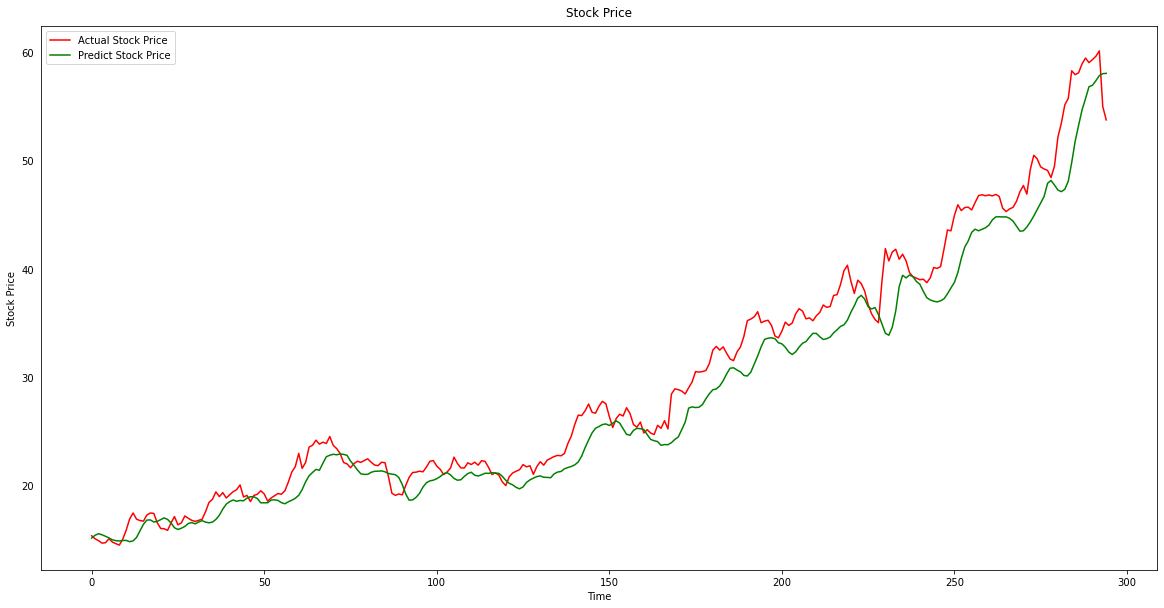

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 3.8579, 2.4525
RMSE_test, MAE_test = 2.5578, 1.9668

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5043
Precision  according to the trend: 0.5481
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5408
Precision  according to the trend: 0.4727


In [8]:
y_train, y_train_pred = LSTM_predict(model_lstm, data_train, sc, timeStep=timeStep)

y_test, y_test_pred = LSTM_predict(model_lstm, data_test, sc, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.3. ARIMA_LSTM model

Epoch 1/500
18/18 [==============================] - 2s 122ms/step - loss: 1.1739 - val_loss: 0.0829
Epoch 2/500
18/18 [==============================] - 0s 14ms/step - loss: 0.9685 - val_loss: 0.0905
Epoch 3/500
18/18 [==============================] - 0s 13ms/step - loss: 0.7814 - val_loss: 0.0374
Epoch 4/500
18/18 [==============================] - 0s 13ms/step - loss: 0.6115 - val_loss: 0.0286
Epoch 5/500
18/18 [==============================] - 0s 13ms/step - loss: 0.6347 - val_loss: 0.1123
Epoch 6/500
18/18 [==============================] - 0s 13ms/step - loss: 0.5922 - val_loss: 0.0251
Epoch 7/500
18/18 [==============================] - 0s 13ms/step - loss: 0.5174 - val_loss: 0.0253
Epoch 8/500
18/18 [==============================] - 0s 13ms/step - loss: 0.5218 - val_loss: 0.0308
Epoch 9/500
18/18 [==============================] - 0s 12ms/step - loss: 0.4994 - val_loss: 0.0467
Epoch 10/500
18/18 [==============================] - 0s 12ms/step - loss: 0.4504 - val_loss: 0.023

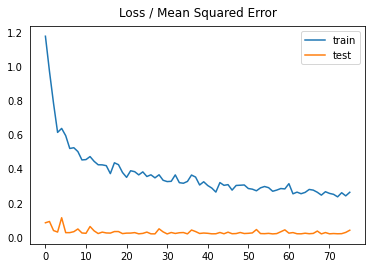

In [9]:
model, history = ARIMA_LSTM_model(data_train, order=order, epochs=epochs, timeStep=timeStep)

plot_history(history)

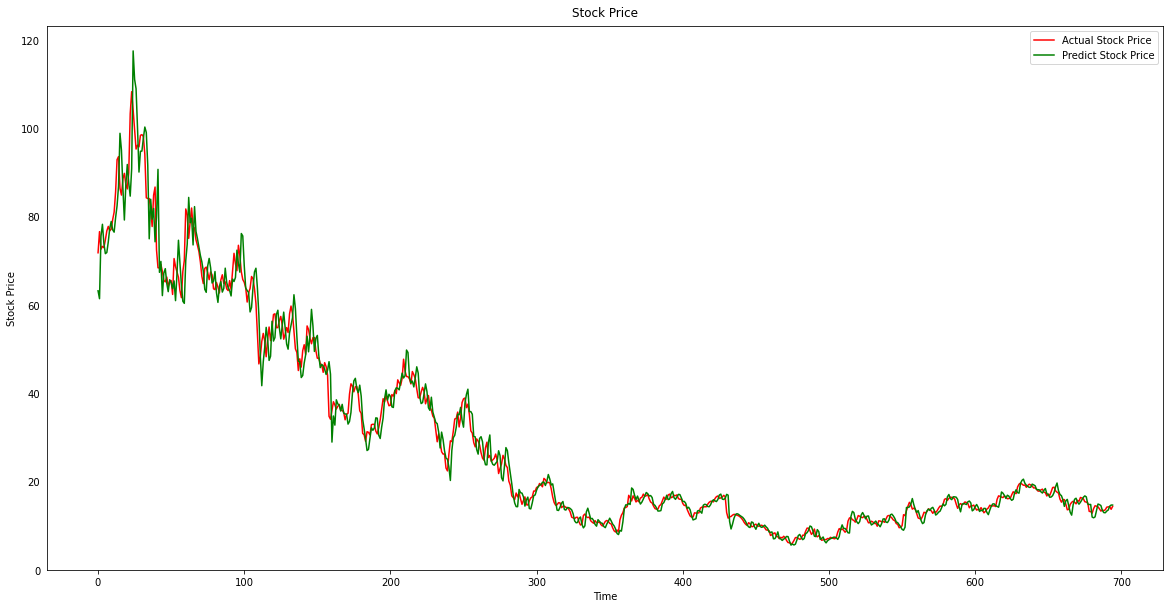

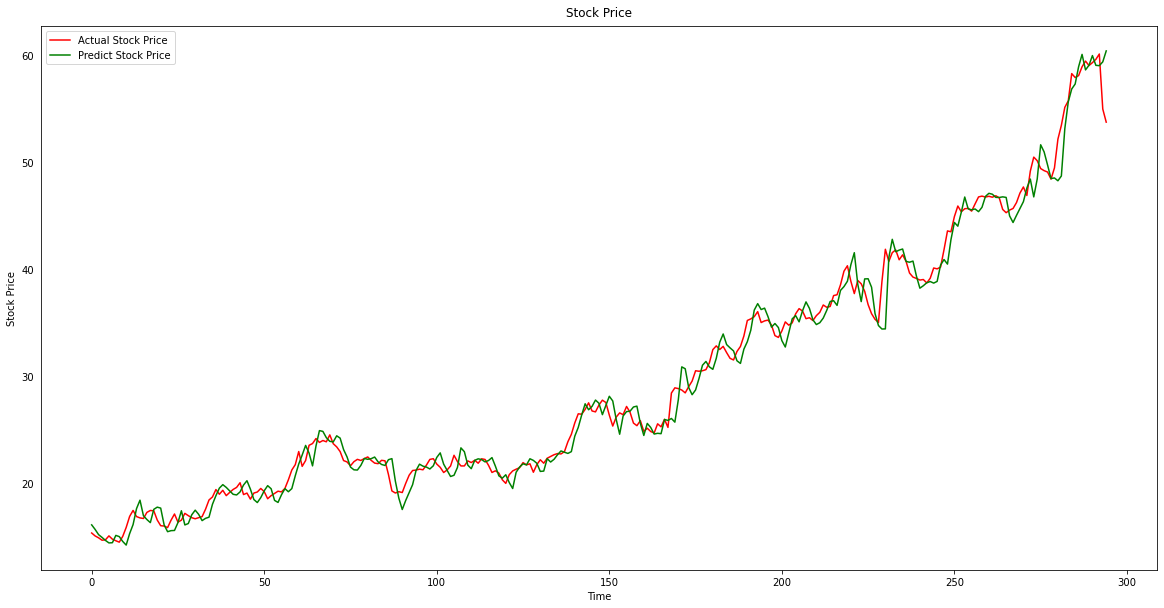

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 3.3478, 2.0445
RMSE_test, MAE_test = 1.3155, 0.9379

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.4798
Precision  according to the trend: 0.5255
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.4966
Precision  according to the trend: 0.4296


In [10]:
y_train, y_train_pred = ARIMA_LSTM_predict(model, data_train,order=order, timeStep=timeStep)

y_test, y_test_pred = ARIMA_LSTM_predict(model, data_test, order=order, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)